## Analysis

In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

from itertools import product

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

from sklearn.metrics import make_scorer
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import classification_report, confusion_matrix, log_loss

from xgboost import XGBClassifier

In [213]:
df = pd.read_csv('.\\heart_failure_clinical_records_dataset.csv')
df

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                      1  265000.00               1.9           130    1   
1                      0  263358.03               1.1           136    1   
2                      0  162000.00               1.3           129    1   
3                      0  210000.00               1.9           137    1   
4                      0  327000.00               2.7           116    0   
..                   ...        ...               ...           ...  ...   
294                    1  155000.00               1.1           143    1   
295                    0  270000.00               1.2           139    0   
296                    0  742000.00               0.8           138    0   
297                    0  140000.00               1.4           140    1   
298                    0  395000.00               1.6           136    1   

     smoking  time  DEATH_EVENT  
0          0     4            1  
1          0     6            1  
2          1     7            1  
3          0     7            1  
4          0     8            1  
..       ...   ...          ...  
294        1   270            0  
295        0   271            0  
296        0   278            0  
297        1   280            0  
298        1   285            0  

[299 rows x 13 columns]

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [215]:
df.describe()

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

In [216]:
for col in df:
  unq_vals = df[col].unique()
  num_unq_vals = len(unq_vals)
  
  if num_unq_vals < 12:
    print(f'{col:17} | {df[col].dtype} | {num_unq_vals:5} | {unq_vals}')
  else:
    print(f'{col:17} | {df[col].dtype} | {num_unq_vals:5} |')

age               | float64 |    47 |
anaemia           | int64 |     2 | [0 1]
creatinine_phosphokinase | int64 |   208 |
diabetes          | int64 |     2 | [0 1]
ejection_fraction | int64 |    17 |
high_blood_pressure | int64 |     2 | [1 0]
platelets         | float64 |   176 |
serum_creatinine  | float64 |    40 |
serum_sodium      | int64 |    27 |
sex               | int64 |     2 | [1 0]
smoking           | int64 |     2 | [0 1]
time              | int64 |   148 |
DEATH_EVENT       | int64 |     2 | [1 0]


*Notes:*
- **anaemia**, **diabetes**, **high_blood_pressure**, **sex**, **smoking** and **DEATH_EVENT** are boolean values.

In [217]:
bool_cols = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

In [218]:
num_cols = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

[]

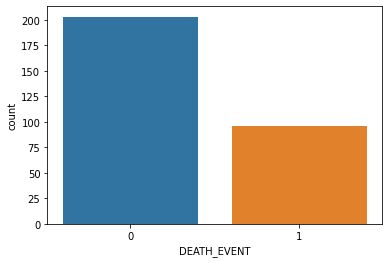

In [219]:
sns.countplot(data=df, x=df['DEATH_EVENT'])
plt.plot()

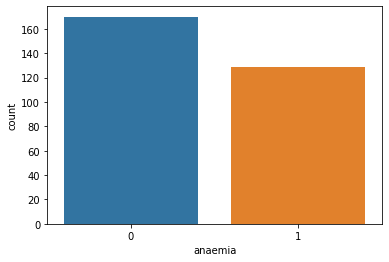

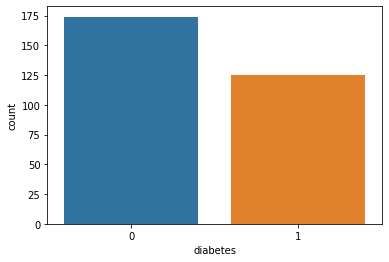

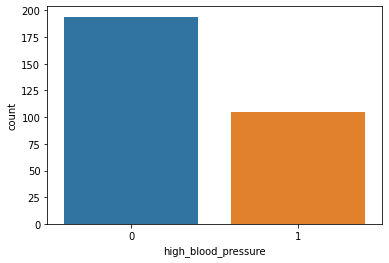

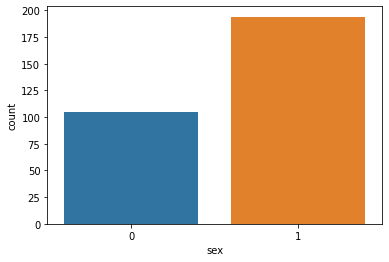

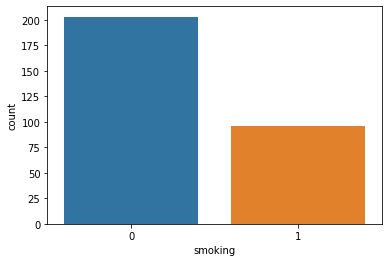

In [220]:
for col in bool_cols:
    sns.countplot(data=df, x=col)
    plt.show()

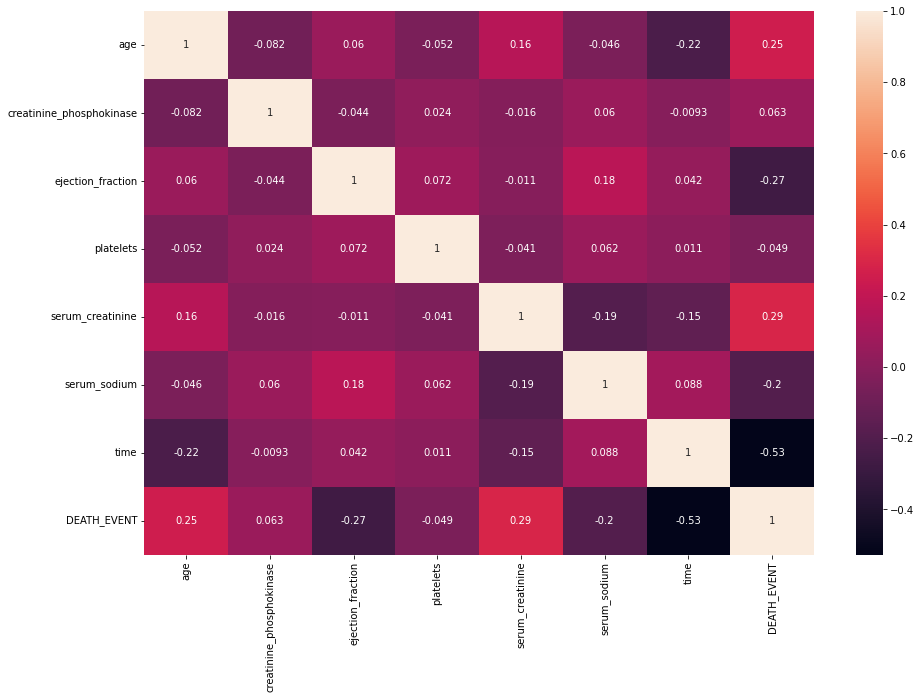

In [221]:
num_cols_df = pd.DataFrame(df[num_cols])
num_cols_df['DEATH_EVENT'] = df['DEATH_EVENT']

plt.figure(figsize=(15, 10))
sns.heatmap(num_cols_df.corr(), annot=True)
plt.show()

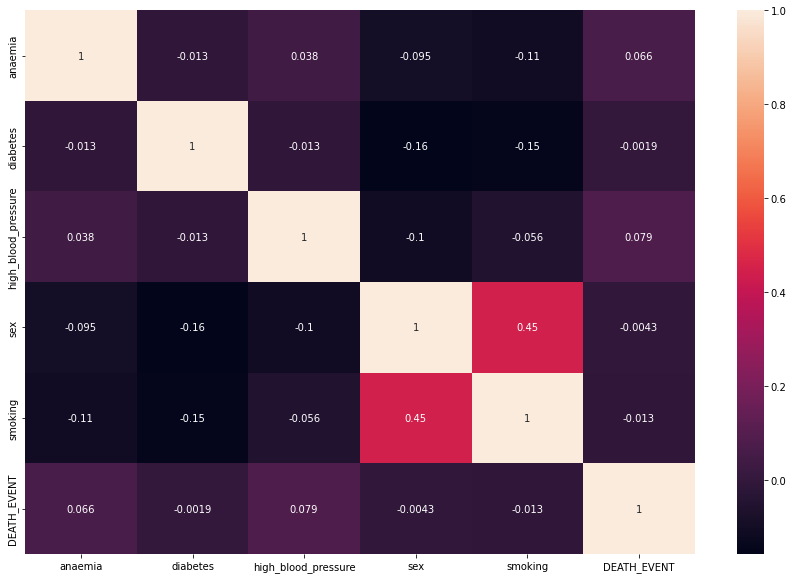

In [222]:
bool_cols_df = pd.DataFrame(df[bool_cols])
bool_cols_df['DEATH_EVENT'] = df['DEATH_EVENT']

plt.figure(figsize=(15, 10))
sns.heatmap(bool_cols_df.corr(), annot=True)
plt.show()

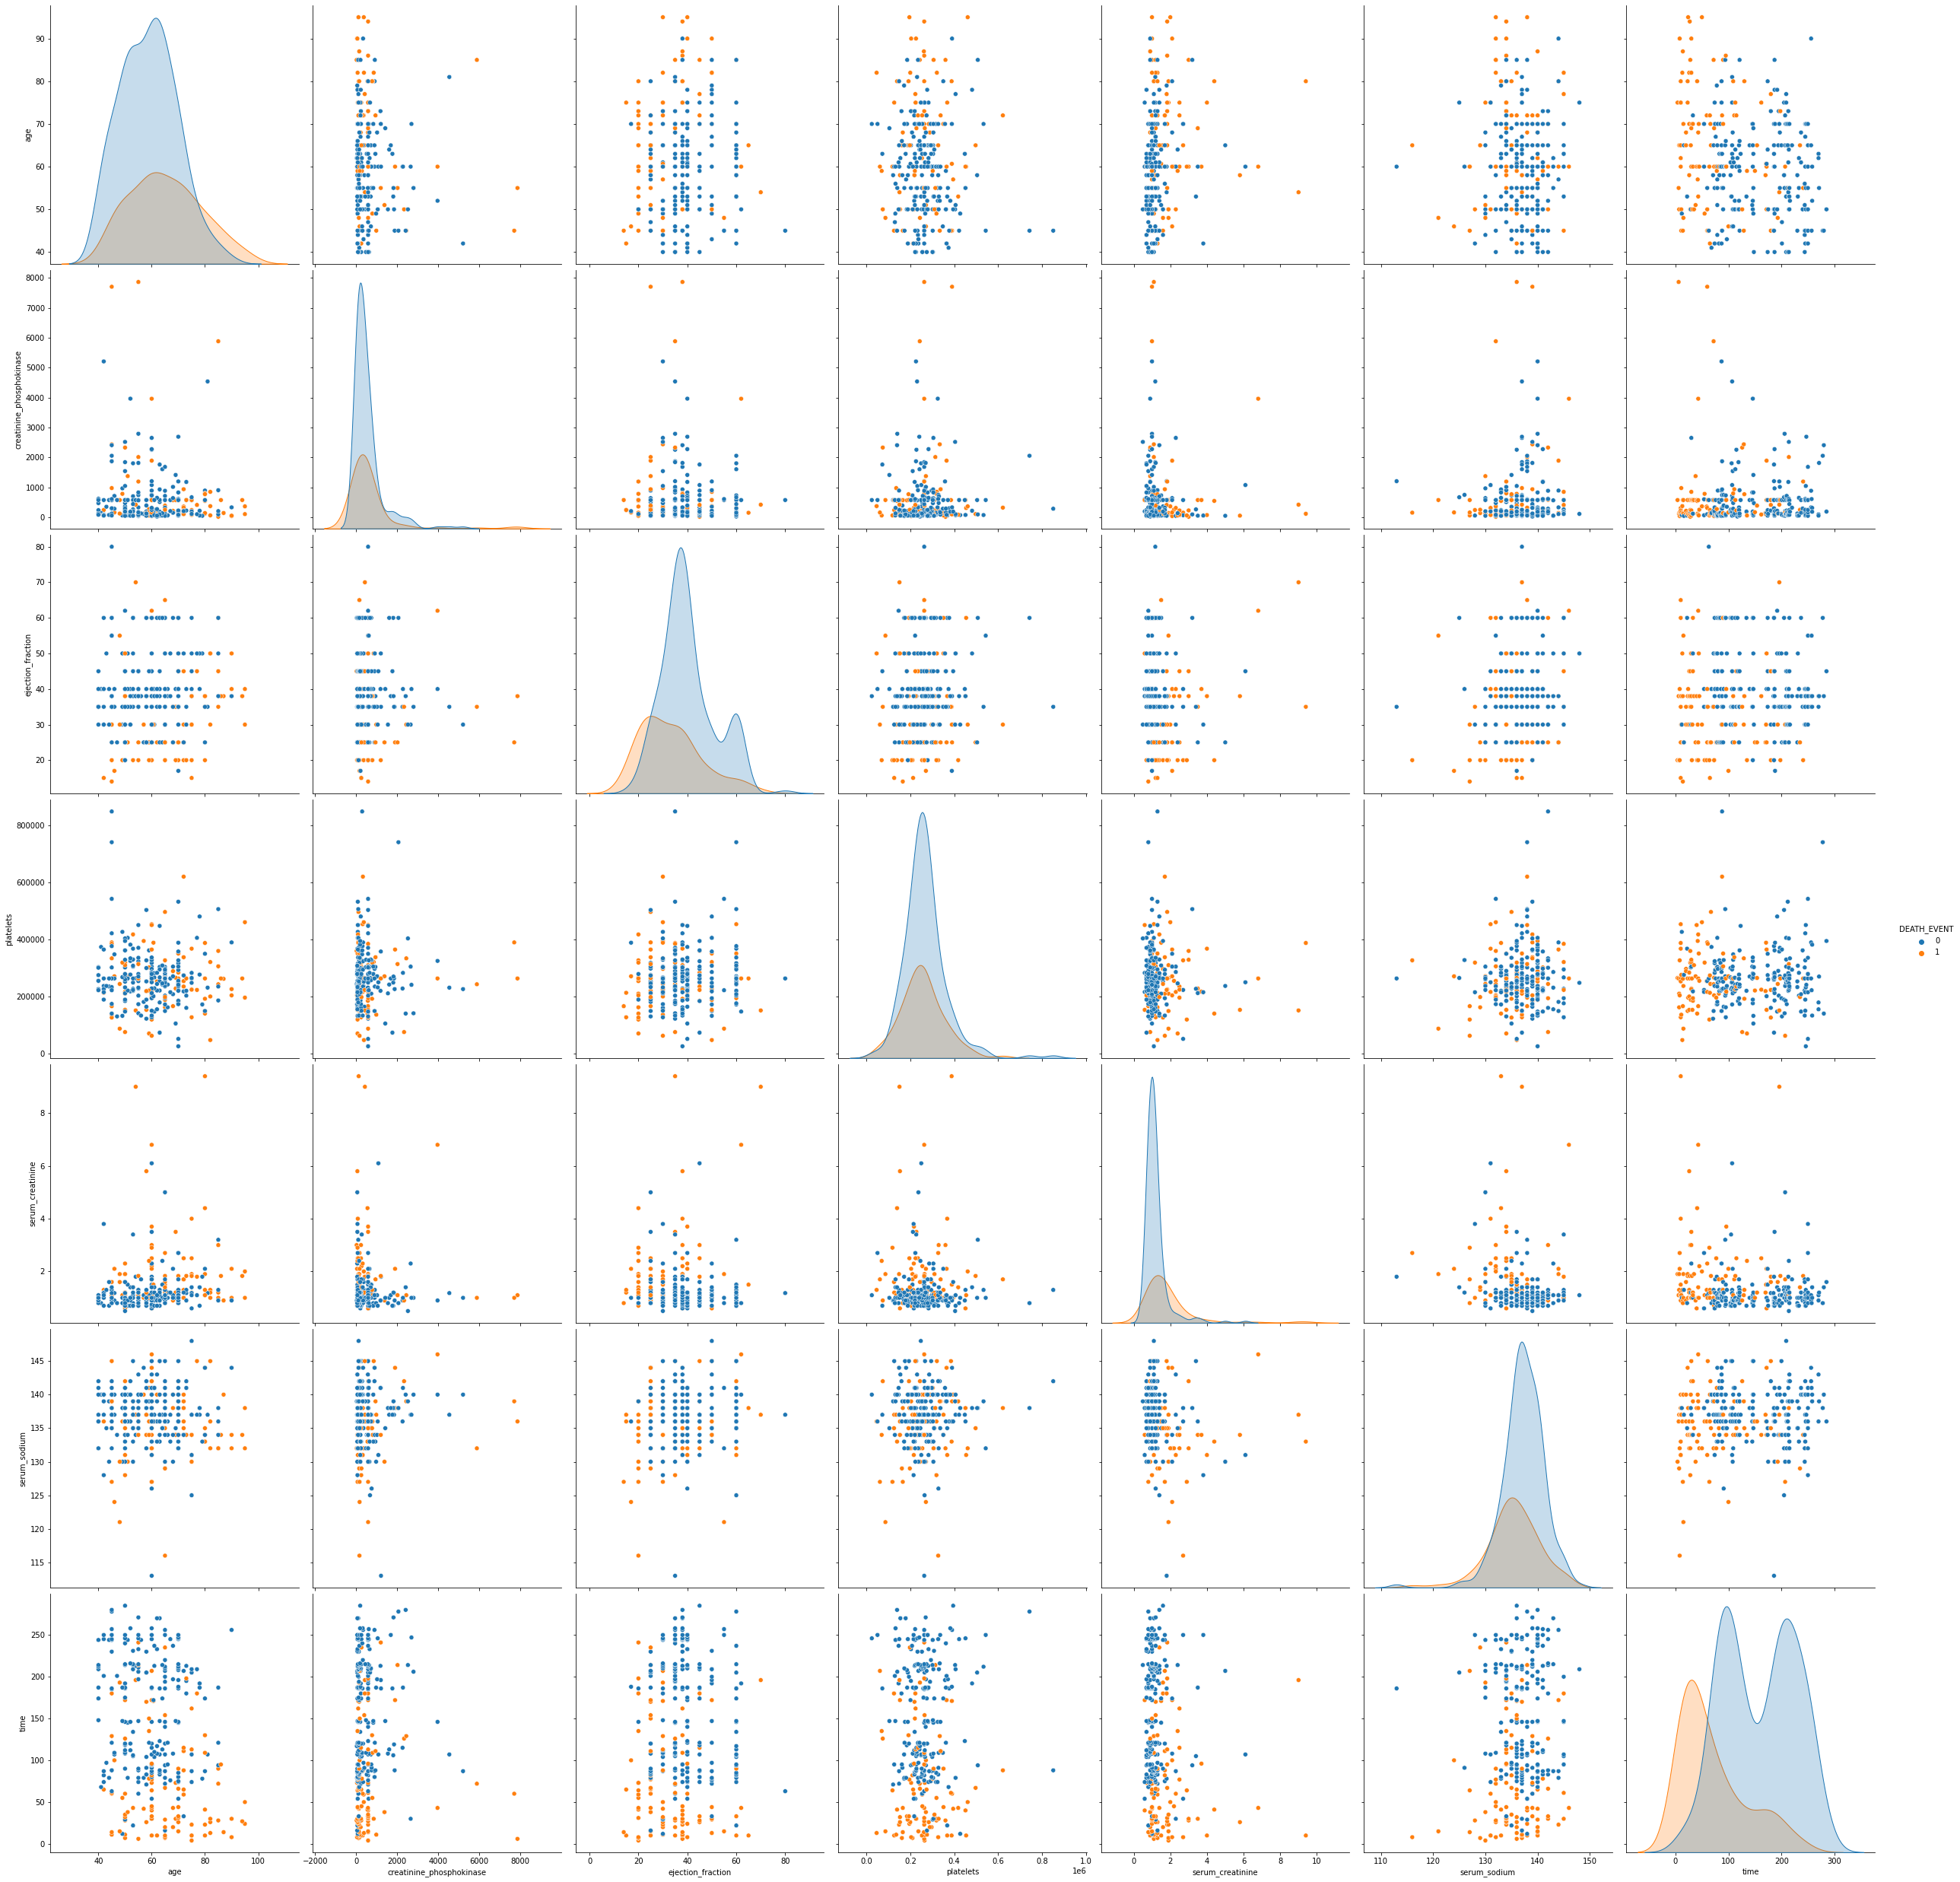

In [223]:
sns.pairplot(df[np.concatenate((num_cols, ['DEATH_EVENT']), axis=0)], hue='DEATH_EVENT', height=5)
plt.show()

In [224]:
for col in num_cols:
    skewness = df[col].skew()
    std = df[col].std()
    
    l_skewness = np.log1p(df[col]).skew()
    l_std = np.log1p(df[col]).std()
    
    if skewness > 0.5 and np.abs(l_skewness) <= 0.5:
        print(f'{col:30} | Skw: {skewness:10.2f} => {l_skewness:.2f}')
    
    if std > 1 and l_std <= 1:
        print(f'{col:30} | Std: {std:10.2f} => {l_std:.2f}')

age                            | Std:      11.89 => 0.19
creatinine_phosphokinase       | Skw:       4.46 => 0.42
ejection_fraction              | Skw:       0.56 => -0.25
ejection_fraction              | Std:      11.83 => 0.31
platelets                      | Std:   97804.24 => 0.40
serum_creatinine               | Std:       1.03 => 0.29
serum_sodium                   | Std:       4.41 => 0.03
time                           | Std:      77.61 => 0.88


## Preprocessing

In [225]:
def preprocess_inputs(df, scale=False, split=True):
  df = df.copy()
  
  for col in num_cols:
    df[col] = np.log1p(df[col])

  X = df.drop(['DEATH_EVENT'], axis=1)
  y = df['DEATH_EVENT']

  if scale:
    scaler = StandardScaler()
    scaler.fit(X)
    X = pd.DataFrame(scaler.transform(X), index=X.index, columns=X.columns)

  if split == False:
    return X, y

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
  
  return X_train, X_test, y_train, y_test

In [226]:
X_train, X_test, y_train, y_test = preprocess_inputs(df, scale=True)

In [227]:
X_train

age   anaemia  creatinine_phosphokinase  diabetes  \
294  0.193095 -0.871105                 -1.364532  1.179830   
20   0.435956  1.147968                 -1.503625 -0.847579   
151  0.193095 -0.871105                 -1.979240  1.179830   
268 -1.448734 -0.871105                  0.622916  1.179830   
168  0.435956 -0.871105                  0.622916  1.179830   
..        ...       ...                       ...       ...   
250 -0.910055 -0.871105                  1.922146 -0.847579   
187  0.024676 -0.871105                  1.669242  1.179830   
71  -0.149359 -0.871105                  0.622916  1.179830   
191  0.356251  1.147968                 -1.350342 -0.847579   
252 -0.910055 -0.871105                 -0.142296 -0.847579   

     ejection_fraction  high_blood_pressure  platelets  serum_creatinine  \
294           0.143199             1.359272  -1.146503         -0.277325   
20           -1.172188             1.359272   0.294396          0.041589   
151           1.594343             1.359272  -0.013357         -0.628181   
268           0.143199            -0.735688   0.519221         -0.628181   
168           0.305440            -0.735688   0.239507         -0.448366   
..                 ...                  ...        ...               ...   
250          -0.601573             1.359272   1.245916         -1.456874   
187          -1.172188            -0.735688   0.992392          1.087996   
71           -0.116471            -0.735688  -1.744373         -0.628181   
191           1.594343            -0.735688   0.576446          0.333894   
252           0.678741             1.359272   0.276234         -0.448366   

     serum_sodium       sex   smoking      time  
294      1.402865  0.735688  1.454161  1.144593  
20       0.099349 -1.359272 -0.687682 -2.019986  
151      0.540048  0.735688 -0.687682  0.194348  
268      0.758041 -1.359272 -0.687682  1.029319  
168      0.320491 -1.359272 -0.687682  0.397870  
..            ...       ...       ...       ...  
250      0.540048 -1.359272 -0.687682  0.880034  
187      1.614825 -1.359272 -0.687682  0.631629  
71       0.540048  0.735688  1.454161 -0.370266  
191     -0.347783 -1.359272 -0.687682  0.644766  
252     -0.801539  0.735688 -0.687682  0.885337  

[179 rows x 12 columns]

## Classification

### KNN

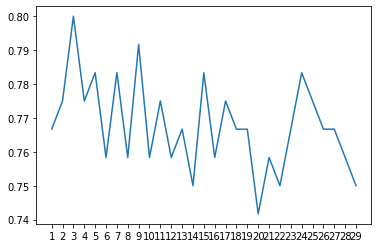

In [228]:
best_KNN_model = None
best_score = -1
scores = {}

for neighs in range(1, 30):
  model = KNeighborsClassifier(neighs)
  model.fit(X_train, y_train)

  score = model.score(X_test, y_test)

  if score > best_score:
    best_score = score
    best_KNN_model = model
  
  scores[str(neighs)] = score

plt.plot(list(scores.keys()), list(scores.values()))
plt.show()

In [229]:
y_pred = best_KNN_model.predict(X_test)
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))
print(f'Best score: {best_score}')

              precision    recall  f1-score   support

           0       0.83      0.91      0.87        85
           1       0.70      0.54      0.61        35

    accuracy                           0.80       120
   macro avg       0.77      0.72      0.74       120
weighted avg       0.79      0.80      0.79       120

Best score: 0.8


In [230]:
print(confusion_matrix(y_test, y_pred))

[[77  8]
 [16 19]]


### Logistic Regression

In [231]:
model = LogisticRegression()
model.fit(X_train, y_train)
print(f'Score: {model.score(X_test, y_test)}')

Score: 0.825


In [232]:
y_pred = model.predict(X_test)
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88        85
           1       0.71      0.69      0.70        35

    accuracy                           0.82       120
   macro avg       0.79      0.78      0.79       120
weighted avg       0.82      0.82      0.82       120



In [233]:
print(confusion_matrix(y_test, y_pred))

[[75 10]
 [11 24]]


In [234]:
log_loss(y_test, model.predict_proba(X_test))

0.36418671383515905

In [235]:
log_loss(y_train, model.predict_proba(X_train))

0.32868122923507476

### Decision Tree

In [236]:
X_train, X_test, y_train, y_test = preprocess_inputs(df, scale=False, split=True)

Train accuracy: 0.8156424581005587
Test accuracy: 0.8833333333333333


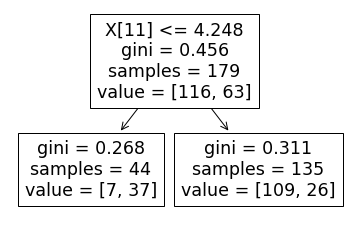

In [237]:
model = DecisionTreeClassifier(max_depth=1) # best accuracy achieved with depth 1
model.fit(X_train, y_train)
print(f'Train accuracy: {model.score(X_train, y_train)}')
print(f'Test accuracy: {model.score(X_test, y_test)}')
ax = plot_tree(model)

In [238]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[83  4]
 [10 23]]


In [239]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92        87
           1       0.85      0.70      0.77        33

    accuracy                           0.88       120
   macro avg       0.87      0.83      0.84       120
weighted avg       0.88      0.88      0.88       120



In [240]:
log_loss(y_test, y_pred)

4.029550565987253

### Random Forest

In [241]:
model = RandomForestClassifier(n_estimators=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'Train accuracy: {model.score(X_train, y_train)}')
print(f'Test accuracy: {model.score(X_test, y_test)}')

Train accuracy: 1.0
Test accuracy: 0.8833333333333333


In [242]:
criterions = ['gini', 'entropy']
n_estimators = [10, 50, 100, 150, 200]
max_features = [1, 'sqrt', 'log2']
max_depths = [None, 2, 3, 4, 5, 10, 20]

scores = {}

for n, f, d, c in product(n_estimators, max_features, max_depths, criterions):
  model = RandomForestClassifier(n_estimators=n, criterion=c, max_features=f, max_depth=d, n_jobs=-1)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  loss = log_loss(y_test, y_pred)
  scores[(n, f, d, c)] = loss
  
  print(f'Loss for {n, f, d, c}: {loss:.2f}')

Loss for (10, 1, None, 'gini'): 6.62
Loss for (10, 1, None, 'entropy'): 7.48
Loss for (10, 1, 2, 'gini'): 7.48
Loss for (10, 1, 2, 'entropy'): 7.77
Loss for (10, 1, 3, 'gini'): 4.32
Loss for (10, 1, 3, 'entropy'): 6.33
Loss for (10, 1, 4, 'gini'): 6.91
Loss for (10, 1, 4, 'entropy'): 6.91
Loss for (10, 1, 5, 'gini'): 7.48
Loss for (10, 1, 5, 'entropy'): 6.91
Loss for (10, 1, 10, 'gini'): 7.20
Loss for (10, 1, 10, 'entropy'): 6.91
Loss for (10, 1, 20, 'gini'): 6.04
Loss for (10, 1, 20, 'entropy'): 8.35
Loss for (10, 'sqrt', None, 'gini'): 4.89
Loss for (10, 'sqrt', None, 'entropy'): 4.89
Loss for (10, 'sqrt', 2, 'gini'): 6.33
Loss for (10, 'sqrt', 2, 'entropy'): 4.03
Loss for (10, 'sqrt', 3, 'gini'): 4.61
Loss for (10, 'sqrt', 3, 'entropy'): 4.03
Loss for (10, 'sqrt', 4, 'gini'): 4.32
Loss for (10, 'sqrt', 4, 'entropy'): 4.32
Loss for (10, 'sqrt', 5, 'gini'): 3.74
Loss for (10, 'sqrt', 5, 'entropy'): 4.03
Loss for (10, 'sqrt', 10, 'gini'): 6.33
Loss for (10, 'sqrt', 10, 'entropy'): 5.18

In [243]:
result = sorted(scores.items(), key=lambda x: x[1])[0]
print(f'Best number of estimators: {result[0][0]}')
print(f'Best max feature: {result[0][1]}')
print(f'Best max depth: {result[0][2]}')
print(f'Best criterion: {result[0][3]}')
print(f'Achieved loss: {result[1]}')

Best number of estimators: 10
Best max feature: log2
Best max depth: 3
Best criterion: gini
Achieved loss: 2.8782513561783123


### XGBoosting

In [244]:
X, y = preprocess_inputs(df, split=False, scale=True)

In [245]:
params={
  "learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30,0.5,0.9],
  "max_depth":[2,3,4,5,6,8,10,12,15,30],
  "min_child_weight":[1,3,5,7, 10, 100,120,200],
  "gamma":[0.0,0.1,0.2,0.3,0.4,0.5,0.8,1],
  "colsample_bytree":[0.3,0.4,0.5,0.7]
}

clf = RandomizedSearchCV(
    XGBClassifier(),
    param_distributions=params,
    scoring='neg_log_loss',
    cv=10,
    verbose=3
)

clf.fit(X,y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.1, max_depth=15, min_child_weight=200;, score=-0.693 total time=   0.0s
[CV 2/10] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.1, max_depth=15, min_child_weight=200;, score=-0.693 total time=   0.0s
[CV 3/10] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.1, max_depth=15, min_child_weight=200;, score=-0.693 total time=   0.0s
[CV 4/10] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.1, max_depth=15, min_child_weight=200;, score=-0.693 total time=   0.0s
[CV 5/10] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.1, max_depth=15, min_child_weight=200;, score=-0.693 total time=   0.0s
[CV 6/10] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.1, max_depth=15, min_child_weight=200;, score=-0.693 total time=   0.0s
[CV 7/10] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.1, max_depth=15, min_child_weight=200;, score=-0.693 total time=

RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None...
                                           num_parallel_tree=None,
                                           predictor=None, random_state

In [246]:
clf.best_params_

{'min_child_weight': 10,
 'max_depth': 30,
 'learning_rate': 0.9,
 'gamma': 1,
 'colsample_bytree': 0.3}

In [247]:
clf.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.9, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=30, max_leaves=0, min_child_weight=10,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [248]:
X_train, X_test, y_train, y_test = preprocess_inputs(df, scale=True, split=True)

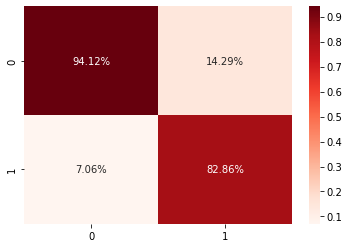

In [249]:
y_pred = clf.best_estimator_.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix, axis=1), annot=True, fmt='.2%', cmap='Reds')

In [250]:
y_pred_proba = clf.best_estimator_.predict_proba(X_test)
log_loss(y_test, y_pred_proba)

0.23623444024318208

### SVC

In [264]:
X, y = preprocess_inputs(df, scale=False, split=False)

In [265]:
params={
    "C":[0.01, 0.1, 1, 10, 100],
    "degree":[0, 1, 2, 3, 4, 5, 10],
    "gamma":['scale', 'auto'],
}

clf = RandomizedSearchCV(
    SVC(probability=True),
    param_distributions=params,
    scoring='neg_log_loss',
    verbose=3
)

clf.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ........C=1, degree=3, gamma=auto;, score=-0.832 total time=   0.0s
[CV 2/5] END ........C=1, degree=3, gamma=auto;, score=-0.394 total time=   0.0s
[CV 3/5] END ........C=1, degree=3, gamma=auto;, score=-0.265 total time=   0.0s
[CV 4/5] END ........C=1, degree=3, gamma=auto;, score=-0.464 total time=   0.0s
[CV 5/5] END ........C=1, degree=3, gamma=auto;, score=-0.888 total time=   0.0s
[CV 1/5] END ......C=10, degree=1, gamma=scale;, score=-0.793 total time=   0.0s
[CV 2/5] END ......C=10, degree=1, gamma=scale;, score=-0.382 total time=   0.0s
[CV 3/5] END ......C=10, degree=1, gamma=scale;, score=-0.268 total time=   0.0s
[CV 4/5] END ......C=10, degree=1, gamma=scale;, score=-0.416 total time=   0.0s
[CV 5/5] END ......C=10, degree=1, gamma=scale;, score=-0.934 total time=   0.0s
[CV 1/5] END .....C=0.1, degree=5, gamma=scale;, score=-1.494 total time=   0.0s
[CV 2/5] END .....C=0.1, degree=5, gamma=scale;,

RandomizedSearchCV(estimator=SVC(probability=True),
                   param_distributions={'C': [0.01, 0.1, 1, 10, 100],
                                        'degree': [0, 1, 2, 3, 4, 5, 10],
                                        'gamma': ['scale', 'auto']},
                   scoring='neg_log_loss', verbose=3)

In [266]:
X_train, X_test, y_train, y_test = preprocess_inputs(df, scale=False, split=True)

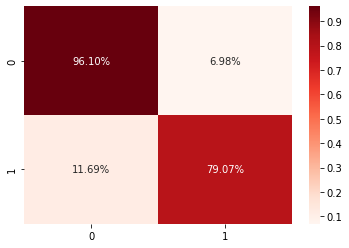

In [267]:
y_pred = clf.best_estimator_.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix, axis=1), annot=True, fmt='.2%', cmap='Reds')

In [268]:
y_pred_proba = clf.best_estimator_.predict_proba(X_test)
log_loss(y_test, y_pred_proba)

0.3043857803606767